<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

Постановка задачи

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Описание данных

# Отток клиентов

Описание данных

Признаки

RowNumber — индекс строки в данных

CustomerId — уникальный идентификатор клиента

Surname — фамилия

CreditScore — кредитный рейтинг

Geography — страна проживания

Gender — пол

Age — возраст

Tenure — сколько лет человек является клиентом банка

Balance — баланс на счёте

NumOfProducts — количество продуктов банка, используемых клиентом

HasCrCard — наличие кредитной карты

IsActiveMember — активность клиента

EstimatedSalary — предполагаемая зарплата

Целевой признак

Exited — факт ухода клиента


используемые модели:
логистическая регрессия, 
случайный лес, 
дерево решений

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('/datasets/Churn.csv')

In [2]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


В столбце Tenure  есть пропуски, нужно их чем-то заполнить средним или 0

In [4]:
df['Tenure'] = df['Tenure'].fillna(0)

In [5]:
#Проверяем датафрейм на дубликаты
df.duplicated().sum()

0

дубликатов нет

In [6]:
df['CustomerId'].duplicated().sum()

0

In [7]:
df['Surname'].duplicated().sum()

7068

In [8]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Вывод

RowNumber — столбец индекс строки в данных не несетя ценности для обучения модели -  можно удалить
CustomerId — уникальный идентификатор клиента дубликатов нет - можно удалить.
Surname — фамилия,  является идентифицирующей пользователя информацией, содержит 7068 дубликатов, 2932 уникальных,сложный столбец, но нет  ценности для качества будущей модели —  можно удалить.
CreditScore — следует проверить распределение и сохранить данный столбец.
Geography — всего 3 уникальных значения, можно вылнить преобразование OHE 
Gender — значение преобразовать — OHE 
Age — Exited — тип данных верны
Tenure — сколько лет человек является клиентом банка
Balance — баланс на счёте
NumOfProducts — количество продуктов банка, используемых клиентом
HasCrCard — наличие кредитной карты
IsActiveMember — активность клиента
EstimatedSalary — предполагаемая зарплата
Exited — факт ухода клиента - целевой

## Исследование задачи

Проводим кодирование, убирая избыточный столец

In [9]:
df_country = pd.get_dummies(df.Geography, drop_first=True)
df_gender = pd.get_dummies(df.Gender, drop_first=True)

Формируем готовый датасет, удалив ненужные столбцы. Для столбца tenure заполняем ячейки NaN медианным значением по имеющимся значениям в столбце.

In [10]:
df_features = df.join([df_gender, df_country]).drop(["Exited", "RowNumber", "CustomerId", "Surname"], axis=1)
df_features  = df_features.drop(['Gender', "Geography"], axis = 1) 
df_features.Tenure.fillna(df_features.Tenure.median(), inplace = True)
display(df_features)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2.0,0.00,1,1,1,101348.88,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8.0,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,1,0,0
9996,516,35,10.0,57369.61,1,1,1,101699.77,1,0,0
9997,709,36,7.0,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0


Смотрим датасет

In [11]:
df_target = df.Exited
display(df_target)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

Формируем выборки:
Обучающая
valid_features, valid_features

Валидационная
features_valid valid_target

Тестовая
test_features test_target

In [12]:
features_temp, test_features, target_temp, test_target = train_test_split(df_features, df_target, test_size=0.4,random_state=54321)
train_features, valid_features, train_target, valid_target = train_test_split(features_temp, target_temp, test_size=0.25, random_state=12345)

print(train_features.shape, valid_features.shape, test_features.shape)
print(train_target.shape,valid_target.shape, test_target.shape)

(4500, 11) (1500, 11) (4000, 11)
(4500,) (1500,) (4000,)


In [13]:
scaler = StandardScaler()
numeric_columns = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]
scaler.fit(train_features[numeric_columns])

StandardScaler()

Стандартизируем тестовую и валидную выборку

In [14]:
train_features[numeric_columns] = scaler.transform(train_features[numeric_columns])
valid_features[numeric_columns] = scaler.transform(valid_features[numeric_columns])
test_features[numeric_columns] = scaler.transform(test_features[numeric_columns])
display(train_features[numeric_columns].head())

,CreditScore,Age,Tenure,Balance,EstimatedSalary
1502,1.497448,-0.001777,0.147963,0.159732,0.076226
116,0.179598,-0.192140,0.470558,1.462843,0.259957
5786,-0.644058,0.093405,0.147963,-1.220711,0.000476
8965,-1.786881,1.806677,1.115747,1.113068,-1.324950
9172,0.941480,-0.001777,1.115747,1.017470,-0.134253


так как был вопрос по параметрам, возврщаю такую реализацию

Расммотрим модели на обучающей выборке:

1. Модель Дерево решений

In [15]:
f1_score_max_tree = 0
for depth in range(1,15,1):
    model_tree=DecisionTreeClassifier(max_depth=depth,random_state=1234).fit(train_features,train_target)
    prediction=model_tree.predict(valid_features)
    if f1_score(valid_target,prediction)>f1_score_max_tree:
        f1_score_max_tree=f1_score(valid_target,prediction)
        depth_max = depth
print('max_depth:',depth_max,'F1:',f1_score_max_tree )

max_depth: 8 F1: 0.5758157389635317


2. Модель Случайный лес

In [16]:
f1_score_max_Forest=0
for estim in range(1,55,2):
    for depth in range(1,25,1):
        model_forest = RandomForestClassifier(random_state=54321, n_estimators = estim, max_depth=depth)
        model_forest.fit(train_features,train_target)
        prediction = model_forest.predict(valid_features)
        if f1_score(valid_target,prediction) > f1_score_max_Forest:
            f1_score_max_Forest = f1_score(valid_target,prediction)
            estim_max=estim
            depth_max = depth
print("estim_max=", estim_max, "depth_max=", depth_max,"F1_Score = ", f1_score_max_Forest)

estim_max= 27 depth_max= 18 F1_Score =  0.5852631578947369


лучшее estim_max= 27 depth_max= 18 F1_Score =  0.5852631578947369

3. Модель 3. Логистическая регрессия

In [17]:
model = LogisticRegression(random_state=54321)
model.fit(train_features,train_target)
prediction = model.predict(valid_features)
print("F1_Score = ", f1_score(valid_target,prediction))

F1_Score =  0.2639593908629442


Рассматривая данные с дисбалансом (но, с переведенные категориальные и стандартизированные данные) тремя моделями можно сделать вывод, что саммая лучшая модель оказалась Случайный лес. При лучшем значении depth_max= 18 F1_Score = 0.5852, на обучающей выборке train_features,train_target.

Далее рассмотрим на тестовой выборке

1. Дерево решений

In [18]:
f1_score_max = 0
for depth in range(1,15,1):
    model_tree=DecisionTreeClassifier(max_depth=depth,random_state=1234).fit(test_features,test_target)
    prediction=model_tree.predict(valid_features)
    if f1_score(valid_target,prediction)>f1_score_max:
        f1_score_max=f1_score(valid_target,prediction)
        depth_max = depth
print('max_depth:',depth_max,'F1:',f1_score_max )

max_depth: 4 F1: 0.5347826086956522


2. Случайный лес

In [19]:
f1_score_max=0
for estim in range(1,55,2):
    for depth in range(1,25,1):
        model_forest = RandomForestClassifier(random_state=54321, n_estimators = estim, max_depth=depth)
        model_forest.fit(test_features,test_target)
        prediction = model_forest.predict(valid_features)
        if f1_score(valid_target,prediction) > f1_score_max:
            f1_score_max = f1_score(valid_target,prediction)
            estim_max=estim
            depth_max = depth
print("estim_max=", estim_max, "depth_max=", depth_max,"F1_Score = ", f1_score_max)

estim_max= 9 depth_max= 10 F1_Score =  0.5738396624472574


3. Логистическая регрессия

In [20]:
model_logistic=LogisticRegression()
model_logistic.fit(test_features,test_target)
prediction=model_logistic.predict(valid_features)
f1_score_logistic= f1_score(valid_target,prediction)
print("F1_Score = ", f1_score_logistic)

F1_Score =  0.32318501170960195


Найдем значения  AUC-ROC для 

1) модели Дерево решений

In [21]:
probabilities_tree=model_tree.predict_proba(valid_features)
probabilities_one_valid_tree=probabilities_tree[:,1]
fpr_tree,tpr_tree,thresholds=roc_curve(valid_target,probabilities_one_valid_tree)

In [22]:
auc_roc_tree=roc_auc_score(valid_target,probabilities_one_valid_tree)

In [23]:
auc_roc_tree

0.6938509546816438

2) Модели Случайны лес

In [24]:
probabilities_forest=model_forest.predict_proba(valid_features)
probabilities_one_valid_forest=probabilities_forest[:,1]
fpr_forest,tpr_forest,thresholds=roc_curve(valid_target,probabilities_one_valid_forest)

In [25]:
auc_roc_forest=roc_auc_score(valid_target,probabilities_one_valid_forest)

In [26]:
auc_roc_forest

0.8282471337438778

3) Модели Логистическая регрессия

In [27]:
probabilities_reg=model_logistic.predict_proba(valid_features)
probabilities_one_valid_reg=probabilities_reg[:,1]
fpr_log,tpr_log,thresholds=roc_curve(valid_target,probabilities_one_valid_reg)

In [28]:
auc_roc_reg=roc_auc_score(valid_target,probabilities_one_valid_reg)

In [29]:
auc_roc_reg

0.751318422536457

Строим ROC-кривую

<Figure size 432x288 with 0 Axes>

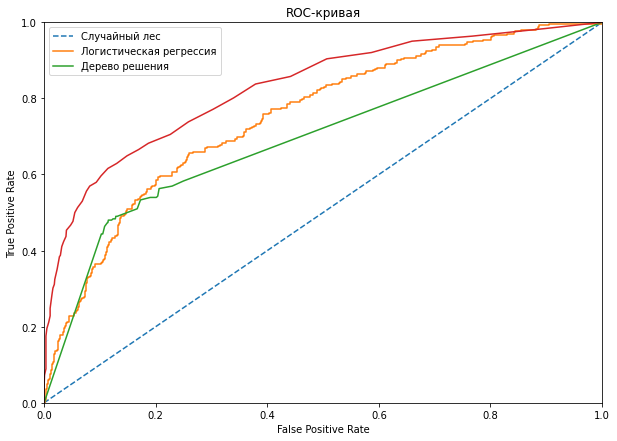

In [30]:
plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_log,tpr_log)
plt.plot(fpr_tree,tpr_tree)
plt.plot(fpr_forest,tpr_forest)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайный лес','Логистическая регрессия','Дерево решения'),
           loc= 'upper left') 
plt.show()

 Случайный лес примерно равную пропорцию позитивных и негативных предсказаний, выдает заметно больше качественных предсказаний, но также сильно склоняется к ложно позитивным предсказаниям (FP). Точность и качество также низкое.
 
Дерево решений склонно выдавать позитивные предсказания, очень высокое количество ложных позитивных предсказания (FP). Видим низкое значение F1, следовательно низкое качество модели, проблема в точности.

Регрессия показала самое низкое значение F1 и полноты.  
 
 

In [31]:
#features_temp, test_features, target_temp, test_target = train_test_split(features, target, test_size=0.2, random_state=12345)
#train_features, valid_features, train_target, valid_target = train_test_split(features_temp, target_temp, test_size=0.25, random_state=12345)

Проверяем дисбаланс

In [32]:
target_temp.value_counts(normalize = 1)

0    0.798
1    0.202
Name: Exited, dtype: float64

<AxesSubplot:ylabel='Frequency'>

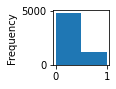

In [33]:
# Построим диаграмму баланса классов
target_temp.plot(kind ='hist', bins=2, figsize=(1,1))

дисбаланс примерно 80 на 20

## Борьба с дисбалансом

На предыдущем этапе выявили, что в  соотношение примерно 80 на 20: отрицательны ответов ≈80% , положитительных ≈ 20%. 
очевидно, необходмо увеличить количество положительных ответов  или уменьшить кол-во отрицтаельных ответов.


In [34]:
def upsampling (features,target,repeat):
    target_one=target[target==1]
    target_null=target[target==0]
    features_one=features[target==1]
    features_null=features[target==0]
    
    upsampling_features=pd.concat([features_null]+[features_one]*repeat)
    upsampling_target=pd.concat([target_null]+[target_one]*repeat)
    
    upsampling_features,upsampling_target=shuffle(upsampling_features,upsampling_target,random_state=1234)
    
    return upsampling_features,upsampling_target

In [35]:
features_balance_up,target_balance_up=upsampling(train_features,train_target,4)

In [36]:
def downsampling(features,target,fraction):
    features_null=features[target==0]
    features_one=features[target==1]
    target_null=target[target==0]
    target_one=target[target==1]
    
    downsampling_features=pd.concat([features_null.sample(frac=0.4,random_state=1234)]+[features_one])
    downsampling_target=pd.concat([target_null.sample(frac=0.4,random_state=1234)]+[target_one])
    
    downsampling_features,downsampling_target=shuffle(downsampling_features,downsampling_target,random_state=1234)
    return downsampling_features,downsampling_target

Метод 1. смотрим дерево 

In [38]:
f1_score_max_tree2 = 0
for depth in range(1,15,1):
    model_tree=DecisionTreeClassifier(max_depth=depth,random_state=1234).fit(features_balance_up,target_balance_up)
    prediction=model_tree.predict(valid_features)
    if f1_score(valid_target,prediction)>f1_score_max_tree2:
        f1_score_max_tree2=f1_score(valid_target,prediction)
        depth_max = depth
print('max_depth:',depth_max,'F1:',f1_score_max_tree2 )

max_depth: 5 F1: 0.5809018567639257


Регрессия

In [39]:
model_logistic=LogisticRegression(random_state=54321).fit(features_balance_up,target_balance_up)
prediction=model_logistic.predict(valid_features)
print('F1:',f1_score(valid_target,prediction))

F1: 0.4782608695652174


Лес

In [40]:
f1_score_max_Forest2=0
for estim in range(1,55,2):
    for depth in range(1,25,1):
        model_forest = RandomForestClassifier(random_state=54321, n_estimators = estim, max_depth=depth)
        model_forest.fit(features_balance_up,target_balance_up)
        prediction = model_forest.predict(valid_features)
        if f1_score(valid_target,prediction) > f1_score_max_Forest2:
            f1_score_max_Forest2 = f1_score(valid_target,prediction)
            estim_max=estim
            depth_max = depth
print("estim_max=", estim_max, "depth_max=", depth_max,"F1_Score = ", f1_score_max_Forest2)

estim_max= 45 depth_max= 9 F1_Score =  0.629746835443038


я случайно удалила комментарий, вот такая релизация подойдет? без class_weight='balanced'

Метод 2. 

In [41]:
features_balance_up_downsampling,target_balance_up_downsampling= downsampling(train_features,train_target,4)

Дерево

In [42]:
f1_score_max = 0
for depth in range(1,15,1):
    model_tree=DecisionTreeClassifier(max_depth=depth,random_state=1234).fit(features_balance_up_downsampling,target_balance_up_downsampling)
    prediction=model_tree.predict(valid_features)
    if f1_score(valid_target,prediction)>f1_score_max:
        f1_score_max=f1_score(valid_target,prediction)
        depth_max = depth
print('max_depth:',depth_max,'F1:',f1_score_max )

max_depth: 5 F1: 0.5987261146496815


Регрессия

In [43]:
model_logistic=LogisticRegression(random_state=54321).fit(features_balance_up_downsampling,target_balance_up_downsampling)
prediction=model_logistic.predict(valid_features)
f1_score_logistic2 = f1_score(valid_target,prediction)
print('F1:',f1_score_logistic2)

F1: 0.4864


Лес

In [44]:
f1_score_max=0
for estim in range(1,55,2):
    for depth in range(1,25,1):
        model_forest = RandomForestClassifier(random_state=54321, n_estimators = estim, max_depth=depth)
        model_forest.fit(features_balance_up_downsampling,target_balance_up_downsampling)
        prediction = model_forest.predict(valid_features)
        if f1_score(valid_target,prediction) > f1_score_max:
            f1_score_max = f1_score(valid_target,prediction)
            estim_max=estim
            depth_max = depth
print("estim_max=", estim_max, "depth_max=", depth_max,"F1_Score = ", f1_score_max)

estim_max= 33 depth_max= 11 F1_Score =  0.6383701188455008


Метод 1 показал лучше результаты на всех трех моделях.

1. Модель Логистчиеская регрессия

In [45]:
probabilities_reg=model_logistic.predict_proba(valid_features)
probabilities_one_valid_reg=probabilities_reg[:,1]
fpr_log,tpr_log,thresholds=roc_curve(valid_target,probabilities_one_valid_reg)

In [46]:
auc_roc_reg=roc_auc_score(valid_target,probabilities_one_valid_reg)

In [47]:
auc_roc_reg

0.7587286758283674

2. Модель Дерево решений

In [48]:
#Дерево
probabilities_tree=model_tree.predict_proba(valid_features)
probabilities_one_valid_tree=probabilities_tree[:,1]
fpr_tree,tpr_tree,thresholds=roc_curve(valid_target,probabilities_one_valid_tree)

In [49]:
auc_roc_tree=roc_auc_score(valid_target,probabilities_one_valid_tree)

In [50]:
auc_roc_tree

0.6880355227807936

Модель 3. Случайный лес

In [51]:
#Лес
probabilities_forest=model_forest.predict_proba(valid_features)
probabilities_one_valid_forest=probabilities_forest[:,1]
fpr_forest,tpr_forest,thresholds=roc_curve(valid_target,probabilities_one_valid_forest)

In [52]:
auc_roc_forest=roc_auc_score(valid_target,probabilities_one_valid_forest)

In [53]:
auc_roc_forest

0.8402801578790258

Строим ROC-кривую

<Figure size 432x288 with 0 Axes>

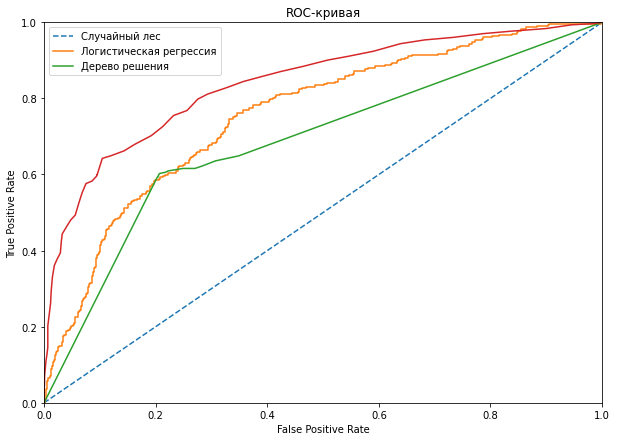

In [54]:
plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_log,tpr_log)
plt.plot(fpr_tree,tpr_tree)
plt.plot(fpr_forest,tpr_forest)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайный лес','Логистическая регрессия','Дерево решения'),
           loc= 'upper left')
plt.show()

Лучшее значение метрики auc roc=0.8426 у модели Случайный лес, затем у логистической регресии - 0.7594, а  у дерева - 0.6923

## Тестирование модели

Выводим итоги обучения:

In [55]:
rezult1={'Дерево Решения':np.array([f1_score_max_tree,f1_score_max_tree2 ]),'Случайный лес':np.array([f1_score_max_Forest,f1_score_max_Forest2]),'Логистическая регрессия':np.array([f1_score_logistic,f1_score_logistic2])}
rezult_df=pd.DataFrame(rezult1,index=['F1 без учета дисбаланса','F1 с учетом дисбаланса'])

In [56]:
rezult_df

,Дерево Решения,Случайный лес,Логистическая регрессия
F1 без учета дисбаланса,0.575816,0.585263,0.323185
F1 с учетом дисбаланса,0.580902,0.629747,0.486400


Возьмем модель, показавшую лучшие результаты - Случайный лес с параметрами estim_max= 45 depth_max= 9, где F1_Score =  0.629746835443038 (чтобы убрать цикл, не очень быстро работает). переобучим модель случайный лес на тестовой выборке

Справка: тестовая выборка
test_features test_target

In [57]:
model_2_u = RandomForestClassifier(random_state=54321, n_estimators = 45, max_depth=9)
model_2_u.fit(features_balance_up,target_balance_up)
predict_test = model_2_u.predict(test_features)
print("F1_Score = ", f1_score(test_target, predict_test))

F1_Score =  0.6199893105291288


результат получили чуть хуже предыдущего, но в пределах нормы.

Рассмотрим метрику AUC-ROC и поведение ROC кривой

In [58]:
probabilities_test = model_2_u.predict_proba(test_features)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(test_target, probabilities_one_test)
print("AUC_ROC=", auc_roc)

AUC_ROC= 0.8615074206633262


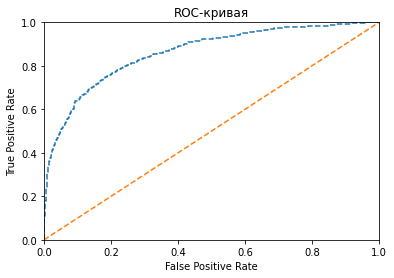

In [59]:
fpr, tpr, thresholds = roc_curve(test_target, probabilities_one_test ) 
plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

На основании вида ROC-кривой можно сделать вывод что модель дает хорошие показатели в предсказании.

Исходная задача: 
Спрогнозировать возможность ухода клиенты из банка исходя из имеющихся данных.
Выводы
В ходе этой работы были изучены исходные данные о взаимодйствии банка и клиентов, включающие информацию об уходе клиентов из банка. Была проведена работа:разбивки  категориальных данных  на колонки с численными значениями (флагами), отброшены не информатиыные (для обучения моделей) колонки. Проведена стандартизация численных значений. В следствии данные были разбиты на целевые и предсказательные, было проведено обучение моделей трех типов, с целью подбора оптимальных гиперпараметров и выбора наилучшей модели.

Аналогичное исследование было проведено с данными после операции балансировки классов, в результате котороый была выбрана наилучшая модель и ее гиперпараметры - - Случайный лес. Выбор осуществлялся по максимизации метрики F1_score, а так же по итогам построения ROC кривой

Полученный показатель Случайного леса на тестовой выборке F1_Score = 0.619. А значени показателя AUC-ROC= 0.861. 
В итоге найдена модель, которая позволит выявить "группу" риска среди клиентов банка.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*